Training model...
Training complete!


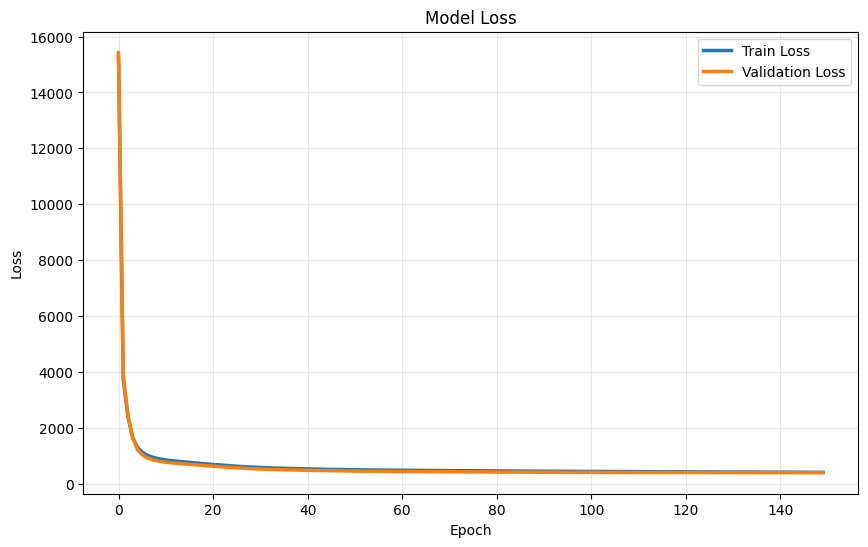

Model saved to aqi_model.pkl
Predicted AQI: 197.35


In [4]:
# Import necessary libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
import joblib

# Load dataset
data_path = r"C:\Users\DELL\Downloads\city_day.csv"  
data = pd.read_csv(data_path)

# Handle missing values
data.dropna(inplace=True)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Line chart for AQI trend
fig1 = px.line(data, x='Date', y='AQI', color='City', title='AQI Trend Over Time')
fig1.show()

# Box plot for AQI distribution by City
fig2 = px.box(data, x='City', y='AQI', title='AQI Distribution by City')
fig2.update_layout(xaxis={'categoryorder': 'total descending'})
fig2.show()

# Feature selection
feature_columns = ['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
X = data[feature_columns]
y = data['AQI']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build MLPRegressor model (equivalent to TensorFlow)
model = MLPRegressor(
    hidden_layer_sizes=(64, 32),
    activation='relu',
    solver='adam',
    learning_rate_init=0.001,
    max_iter=1,
    batch_size=32,
    random_state=42,
    warm_start=True,
    verbose=0
)

# Train model and capture loss history
train_losses = []
val_losses = []

split_idx = int(len(X_train_scaled) * 0.8)
X_train_split = X_train_scaled[:split_idx]
X_val_split = X_train_scaled[split_idx:]
y_train_split = y_train.iloc[:split_idx]
y_val_split = y_train.iloc[split_idx:]

print("Training model...")
for epoch in range(150):
    model.partial_fit(X_train_split, y_train_split)
    
    train_pred = model.predict(X_train_split)
    val_pred = model.predict(X_val_split)
    
    train_loss = mean_squared_error(y_train_split, train_pred)
    val_loss = mean_squared_error(y_val_split, val_pred)
    
    train_losses.append(train_loss)
    val_losses.append(val_loss)

print("Training complete!")

# Plot loss
plt.figure(figsize=(10, 6))
plt.plot(train_losses, label='Train Loss', linewidth=2.5, color='#1f77b4')
plt.plot(val_losses, label='Validation Loss', linewidth=2.5, color='#ff7f0e')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Save model
joblib.dump(model, 'aqi_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
print("Model saved to aqi_model.pkl")

# Sample input for prediction
user_input = pd.DataFrame({
    'PM2.5': [81], 'PM10': [124], 'NO': [1.44], 'NO2': [20], 'NOx': [12],
    'NH3': [10], 'CO': [0.1], 'SO2': [15], 'O3': [127], 'Benzene': [0.20],
    'Toluene': [6], 'Xylene': [0.06]
})

# Scale input data
user_input_scaled = scaler.transform(user_input)

# Make prediction
user_pred = model.predict(user_input_scaled)

print(f"Predicted AQI: {user_pred[0]:.2f}")